In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
retail = pd.read_csv('retail_clean.csv')
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d/%m/%Y %H:%M")
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date'] = pd.to_datetime(retail['date'])
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12-01


In [4]:
max_date = retail['date'].max()
max_date

Timestamp('2011-12-09 00:00:00')

In [5]:
### recency
customer_recency = retail.groupby(by = ['Customer ID']).agg(last_purchase_date = ('date', 'max')).reset_index()
customer_recency['recency'] = max_date - customer_recency['last_purchase_date']
customer_recency['recency'] = customer_recency['recency'].astype('str').str.replace(' days','').astype('int')
customer_recency

,Customer ID,last_purchase_date,recency
0,12346,2011-01-18,325
1,12347,2011-12-07,2
2,12348,2011-09-25,75
3,12349,2011-11-21,18
4,12350,2011-02-02,310
...,...,...,...
5876,18283,2011-12-06,3
5877,18284,2010-10-04,431
5878,18285,2010-02-17,660
5879,18286,2010-08-20,476


In [6]:
### frequency
customer_frequency = retail.groupby(by = ['Customer ID']).agg(frequency = ('date', 'count')).reset_index()
customer_frequency

,Customer ID,frequency
0,12346,34
1,12347,222
2,12348,51
3,12349,175
4,12350,17
...,...,...
5876,18283,938
5877,18284,28
5878,18285,12
5879,18286,67


In [7]:
### monetary value
customer_monetary_value = retail.groupby(by = ['Customer ID', 'Invoice']).agg(revenue = ('Revenue', 'sum')).reset_index()
customer_monetary_value = customer_monetary_value.groupby(by = ['Customer ID']).agg(average_revenue = ('revenue', 'mean')).reset_index()
customer_monetary_value

,Customer ID,average_revenue
0,12346,6463.038333
1,12347,615.191250
2,12348,403.880000
3,12349,1107.172500
4,12350,334.400000
...,...,...
5876,18283,121.131818
5877,18284,461.680000
5878,18285,427.000000
5879,18286,648.215000


In [8]:
customer_recency['rank_recency'] = customer_recency['recency'].rank()
customer_recency

,Customer ID,last_purchase_date,recency,rank_recency
0,12346,2011-01-18,325,4177.5
1,12347,2011-12-07,2,183.5
2,12348,2011-09-25,75,2694.0
3,12349,2011-11-21,18,1130.5
4,12350,2011-02-02,310,4112.5
...,...,...,...,...
5876,18283,2011-12-06,3,275.5
5877,18284,2010-10-04,431,4889.5
5878,18285,2010-02-17,660,5688.5
5879,18286,2010-08-20,476,5109.0


In [9]:
customer_frequency['rank_frequency'] = customer_frequency['frequency'].rank(ascending = False)
customer_frequency

,Customer ID,frequency,rank_frequency
0,12346,34,3652.5
1,12347,222,904.0
2,12348,51,2975.5
3,12349,175,1162.0
4,12350,17,4648.0
...,...,...,...
5876,18283,938,86.5
5877,18284,28,3967.0
5878,18285,12,5006.5
5879,18286,67,2532.0


In [10]:
customer_monetary_value['rank_average_revenue'] = customer_monetary_value['average_revenue'].rank()
customer_monetary_value

,Customer ID,average_revenue,rank_average_revenue
0,12346,6463.038333,5873.0
1,12347,615.191250,5258.0
2,12348,403.880000,4335.0
3,12349,1107.172500,5714.0
4,12350,334.400000,3674.0
...,...,...,...
5876,18283,121.131818,634.0
5877,18284,461.680000,4709.0
5878,18285,427.000000,4497.0
5879,18286,648.215000,5319.0


In [11]:
all_data = pd.merge(left = customer_recency, right = customer_frequency, how = 'inner', on = 'Customer ID')
all_data = pd.merge(left = all_data, right = customer_monetary_value, how = 'inner', on = 'Customer ID')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer ID           5881 non-null   int64         
 1   last_purchase_date    5881 non-null   datetime64[ns]
 2   recency               5881 non-null   int32         
 3   rank_recency          5881 non-null   float64       
 4   frequency             5881 non-null   int64         
 5   rank_frequency        5881 non-null   float64       
 6   average_revenue       5881 non-null   float64       
 7   rank_average_revenue  5881 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2)
memory usage: 344.7 KB


In [12]:
bins = [0, 0.35, 0.75, 1]
names = [1, 2, 3]

percentile_recency = all_data['rank_recency'].quantile(bins)
percentile_frequency = all_data['rank_frequency'].quantile(bins)
percentile_revenue = all_data['rank_average_revenue'].quantile(bins)

final = pd.DataFrame(all_data['Customer ID'])
final['recency'] = pd.cut(all_data['rank_recency'], bins = percentile_recency, labels = names, include_lowest = True, right = True).astype(int)
final['frequency'] = pd.cut(all_data['rank_frequency'], bins = percentile_frequency, labels = names, include_lowest = True, right = True).astype(int)
final['monetary_value'] = pd.cut(all_data['rank_average_revenue'], bins = percentile_revenue, labels = names, include_lowest = True, right = True).astype(int)
final['final_ranking'] = final['recency'] + final['frequency'] + final['monetary_value']

In [13]:
final

,Customer ID,recency,frequency,monetary_value,final_ranking
0,12346,2,2,3,7
1,12347,1,1,3,5
2,12348,2,2,2,6
3,12349,1,1,3,5
4,12350,2,3,2,7
...,...,...,...,...,...
5876,18283,1,1,1,3
5877,18284,3,2,3,8
5878,18285,3,3,3,9
5879,18286,3,2,3,8


<Axes: xlabel='final_ranking', ylabel='count'>

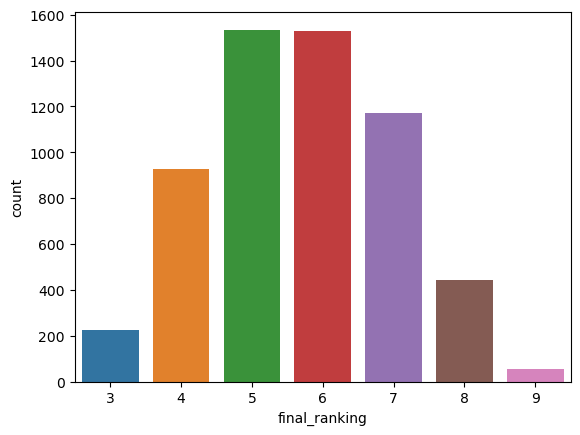

In [14]:
sns.countplot(data = final, x = final['final_ranking'])